In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


training data points: 1212
validation data points: 135
testing data points: 450
k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data
Training time =  0.0019998550415039062
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98    

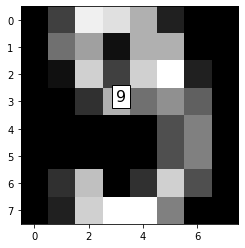

i think the digit is : 1


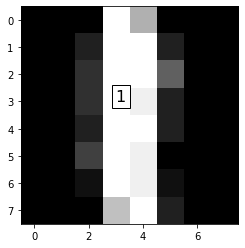

i think the digit is : 3


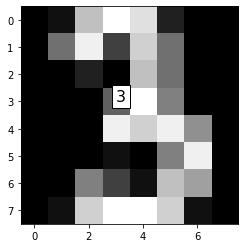

i think the digit is : 6


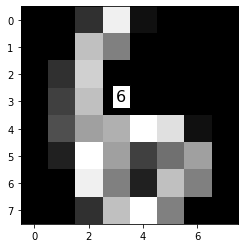

i think the digit is : 3


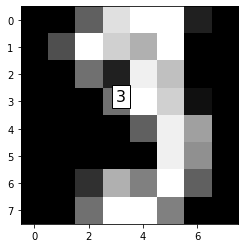

first part execution time =  1.0236730575561523


In [74]:
# import the necessary packages
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
#import imutils
import cv2
import matplotlib.pyplot as plt
import time
start = time.time()

# load the MNIST digits dataset
mnist = datasets.load_digits()

# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing

(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

# show the sizes of each data split

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          
# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
t1_start = time.time()
model.fit(trainData, trainLabels)
t1_end = time.time()
print ("Training time = ", t1_end-t1_start)
predictions = model.predict(testData)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))

# loop over a few random digits

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
         # then resize it to 32 x 32 pixels so we can see it better
##         image = image.reshape((64, 64))
##         image = exposure.rescale_intensity(image, out_range=(0, 255))
##         image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
         
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("i think the digit is : {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
         cv2.waitKey(0)
            
d_end = time.time()
print ("first part execution time = ", d_end-start)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
m_start = time.time()
df = pd.read_csv(r"train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


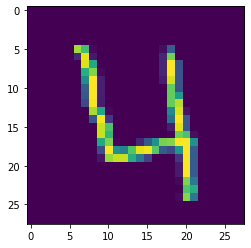

In [78]:
#visualising our dataset using matplotlib
image0 = df.iloc[3,1:]
image0                                                
plt.imshow(np.array(image0).reshape(28,28))

In [79]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain, ytest = train_test_split(x,y,test_size =0.2,shuffle = False,random_state =7)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
t2_start = time.time()
knn.fit(xtrain ,ytrain)
t2_end = time.time()
print ("Training time = ",t2_end-t2_start)

Training time =  7.112739562988281


In [ ]:
knn.predict(xtest)

second part time =  647.3431944847107 
total runtime =  668.1352787017822


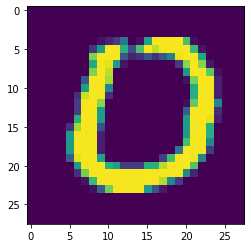

In [83]:
knn.predict(xtest.iloc[0,:].values.reshape(1,784))
imag = xtest.iloc[0,:]

plt.imshow(np.array(imag).reshape(28,28))
m_end = time.time()
end = time.time()
print ("second part time = ", end-m_start, "\ntotal runtime = ", end-start)